In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evoscape.landscapes import CellDiff_Dataset_Landscape
import evoscape.landscape_visuals as vis
from evoscape.morphogen_regimes import mr_piecewise
from evoscape.module_helper_functions import transform_coords, rotate_landscape, landscape_from_timecode, modules_from_txt

from matplotlib import style
style.use('default')

In [72]:
plt.rcParams.update({'figure.dpi': 200})  # Change to 200 for high res figures
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.grid'] = False

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
colors = ('indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'tab:purple')

landscape_pars = {
    'A0': 0.005,
    'regime': mr_piecewise,
}
gen = 300

def pars_from_timecode(timecode, data_dir, gen):
    par_names = []
    par_colors = []
    filename = data_dir + timecode + '/' + timecode + '_module_list_' + str(gen) + '.txt'
    with open(filename, 'r') as f:
        module_list = modules_from_txt(filename)

    n_modules = len(module_list)

    coords = np.zeros((n_modules, 2))
    for i in range(n_modules):
        module = module_list[i]
        coords[i] = module.x, module.y
    pars = []

    # Epi - AN - CE
    origin = 0
    direction = (5,2)
    right = None
    left = None
    bottom = 4


    # Epi - CE - PN/M  coordinate system
    origin = 2
    direction = (3,4)
    right = None
    bottom = 4
    left = 0
    coords = transform_coords(module_list, coords, origin=origin, direction=direction, left=left, right=right, bottom=bottom, scale=False)

    for i in range(n_modules):
        par_names.append('M'+str(i)+' x')
        par_colors.append(colors[i])
        pars.append(coords[i, 0])

        par_names.append('M'+str(i)+' y')
        pars.append(coords[i, 1])
        par_colors.append(colors[i])

    for i in (2,3,4):
        module = module_list[i]
        pars.extend(module.a[0:])
        for j in range(0, len(module.a)):
            par_names.append('M'+str(i)+' a'+ str(j))
            par_colors.append(colors[i])

    for i in (2,3,4):
        module = module_list[i]
        pars.extend(module.s[0:])
        for j in range(0, len(module.s)):
            par_names.append('M'+str(i)+' s'+ str(j))
            par_colors.append(colors[i])

    return np.array(pars), par_names, par_colors

(1200,)
0
-2.159316304568121
1200


/Users/victoria/Code/evoscape/src/evoscape/module_helper_functions.py:93: RuntimeWarning: invalid value encountered in divide
  norm_coords = (module_coords.T / np.linalg.norm(module_coords, axis=1).T).T


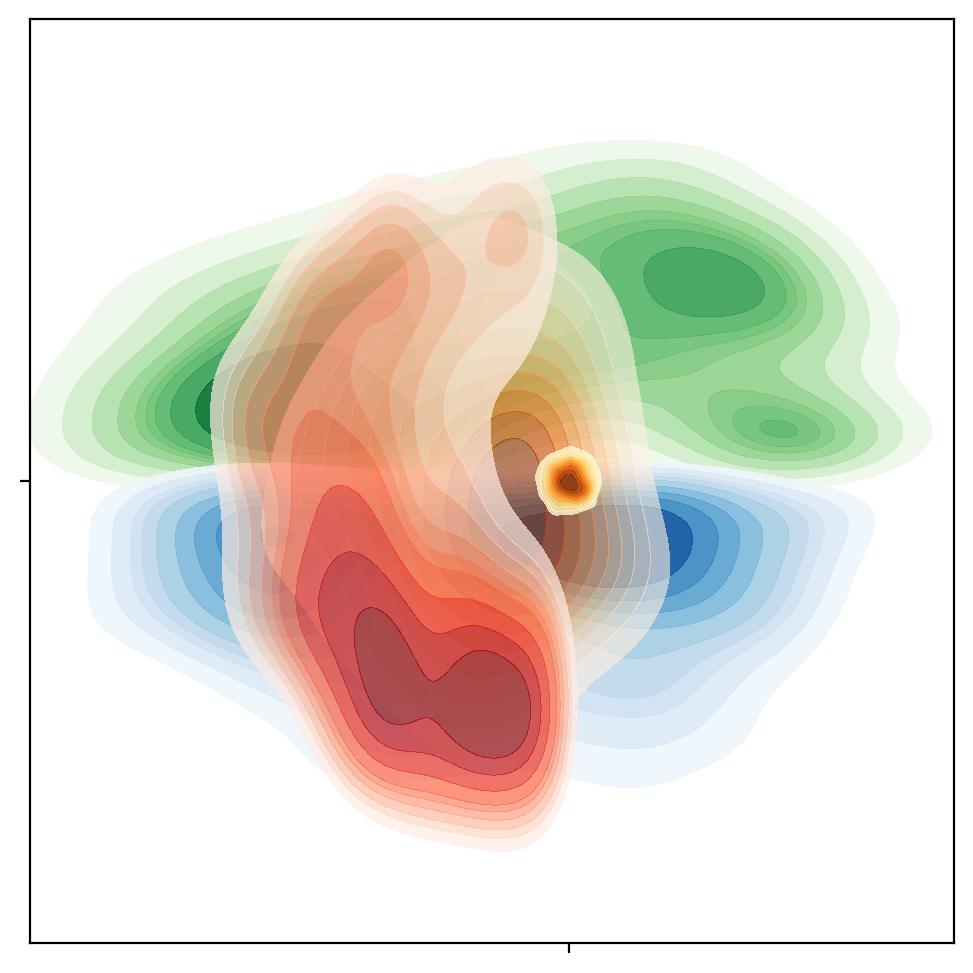

300
-0.3071472585884739
600


/Users/victoria/Code/evoscape/src/evoscape/module_helper_functions.py:93: RuntimeWarning: invalid value encountered in divide
  norm_coords = (module_coords.T / np.linalg.norm(module_coords, axis=1).T).T


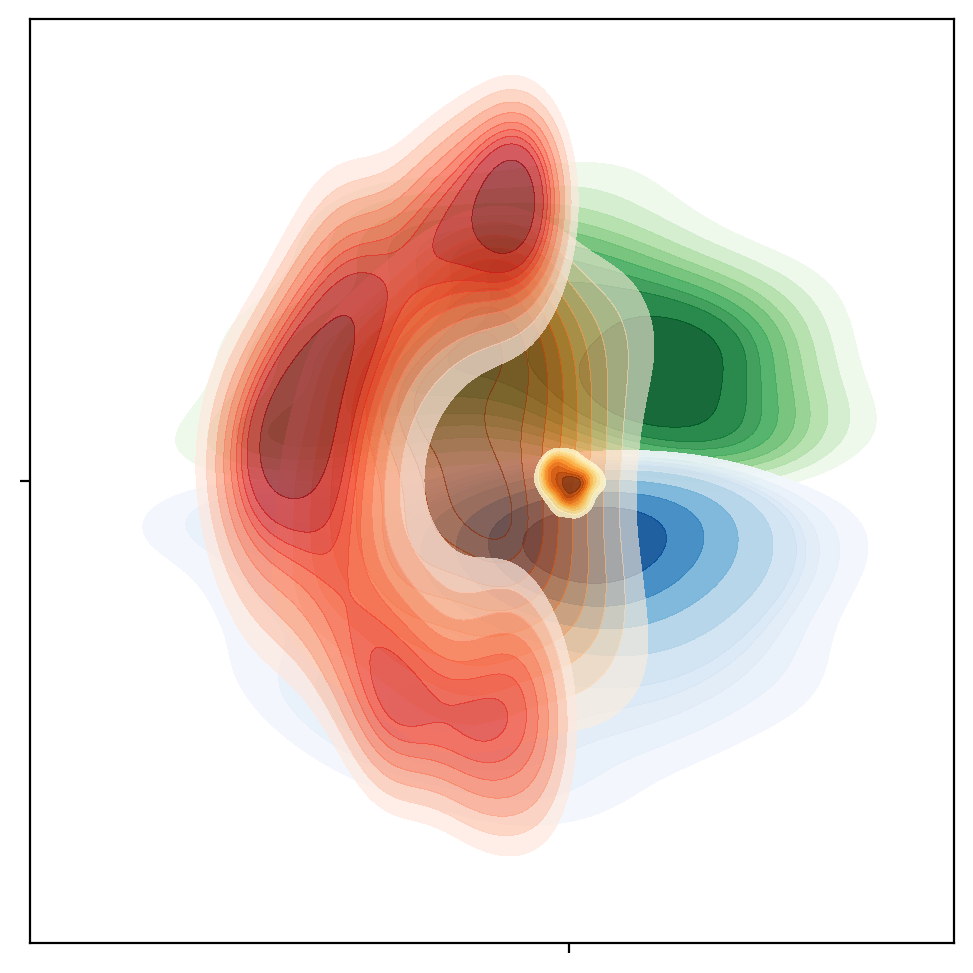

300
-0.2139814066141891
240


/Users/victoria/Code/evoscape/src/evoscape/module_helper_functions.py:93: RuntimeWarning: invalid value encountered in divide
  norm_coords = (module_coords.T / np.linalg.norm(module_coords, axis=1).T).T


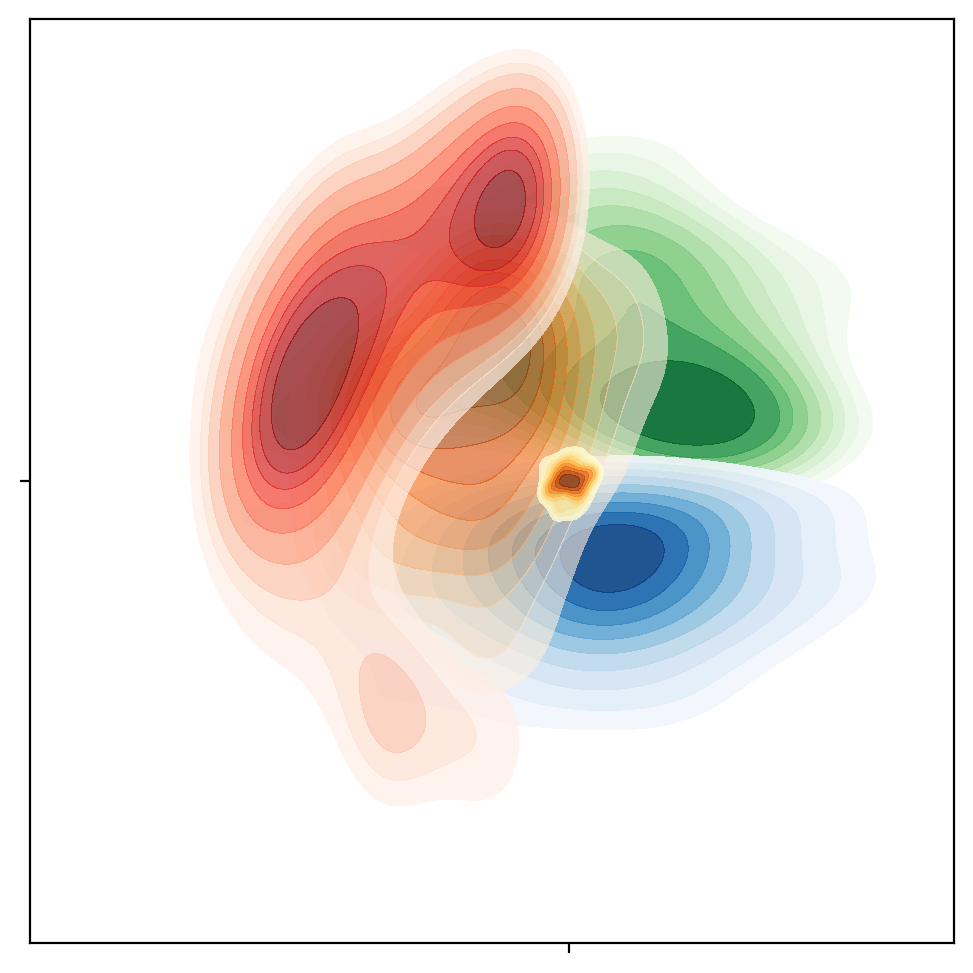

In [88]:
data_dir = '../alfyn_results_wide_prior/saved_files_4/CellDiff_Dataset_Landscape/'
file_name = data_dir + 'optimization_log.csv'

# log = pd.read_csv(file_name, sep='\t', names=['Timecode', 'Init timecode', 'Fitness'], skiprows=1)
log = np.genfromtxt(file_name, delimiter='\t', skip_header=1, names=['Timecode', 'Init_timecode', 'Fitness'], dtype=None, encoding='utf-8')
print(log.shape)

for (n_landscapes, gen) in ((1200, 0), (600, 300), (240, 300)):
    print(gen)
    fitness_threshold = np.partition(log['Fitness'], -n_landscapes)[-n_landscapes]
    print(fitness_threshold)

    timecodes = log['Timecode'][log['Fitness'] >= fitness_threshold]
    fitnesses = log['Fitness'][log['Fitness'] >= fitness_threshold]
    print(len(timecodes))


    all_pars = np.zeros((n_landscapes, 2*5 + 3*2*3))

    for i, timecode in enumerate(timecodes):
        # print(timecode)
        all_pars[i, :], par_names, par_colors = pars_from_timecode(timecode, data_dir, gen)


    fig, ax = plt.subplots(figsize=(6,6))
    # sns.kdeplot(x=all_pars[:, 10], y=all_pars[:, 11], cmap='Purples', fill=True, alpha=0.8, thresh=0.2)

    sns.kdeplot(x=all_pars[:, 6], y=all_pars[:, 7], cmap='Greens', fill=True, alpha=0.9, thresh=0.25)
    sns.kdeplot(x=all_pars[:, 8], y=all_pars[:, 9], cmap='Blues', fill=True, alpha=0.9, thresh=0.25)
    sns.kdeplot(x=all_pars[:, 2], y=all_pars[:, 3], cmap='Oranges', fill=True, alpha=0.6, thresh=0.25)
    sns.kdeplot(x=all_pars[:, 0], y=all_pars[:, 1], cmap='Reds', fill=True, alpha=0.7, thresh=0.25)
    sns.kdeplot(x=0.25*np.random.randn(n_landscapes), y=0.25*np.random.randn(n_landscapes), cmap='YlOrBr', fill=True, alpha=0.8, thresh=0.25)

    plt.ylim((-6,6))
    plt.xlim((-7, 5))
    plt.xticks((0,), labels=[])
    plt.yticks((0,), labels=[])

    ax.set_aspect('equal')
    plt.show()

(239,)
239 300
-2.986004080062141
239


/Users/victoria/Code/evoscape/src/evoscape/module_helper_functions.py:93: RuntimeWarning: invalid value encountered in divide
  norm_coords = (module_coords.T / np.linalg.norm(module_coords, axis=1).T).T


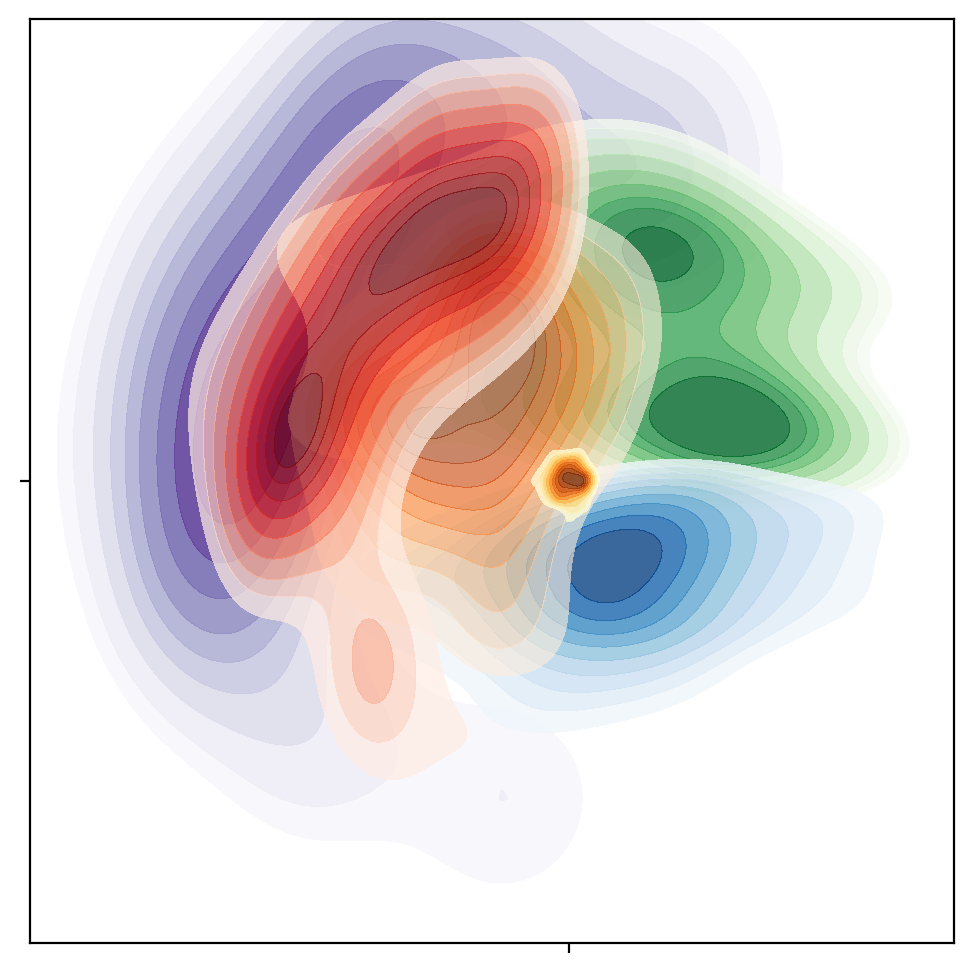

60 300
-0.5686603997246658
60


/Users/victoria/Code/evoscape/src/evoscape/module_helper_functions.py:93: RuntimeWarning: invalid value encountered in divide
  norm_coords = (module_coords.T / np.linalg.norm(module_coords, axis=1).T).T


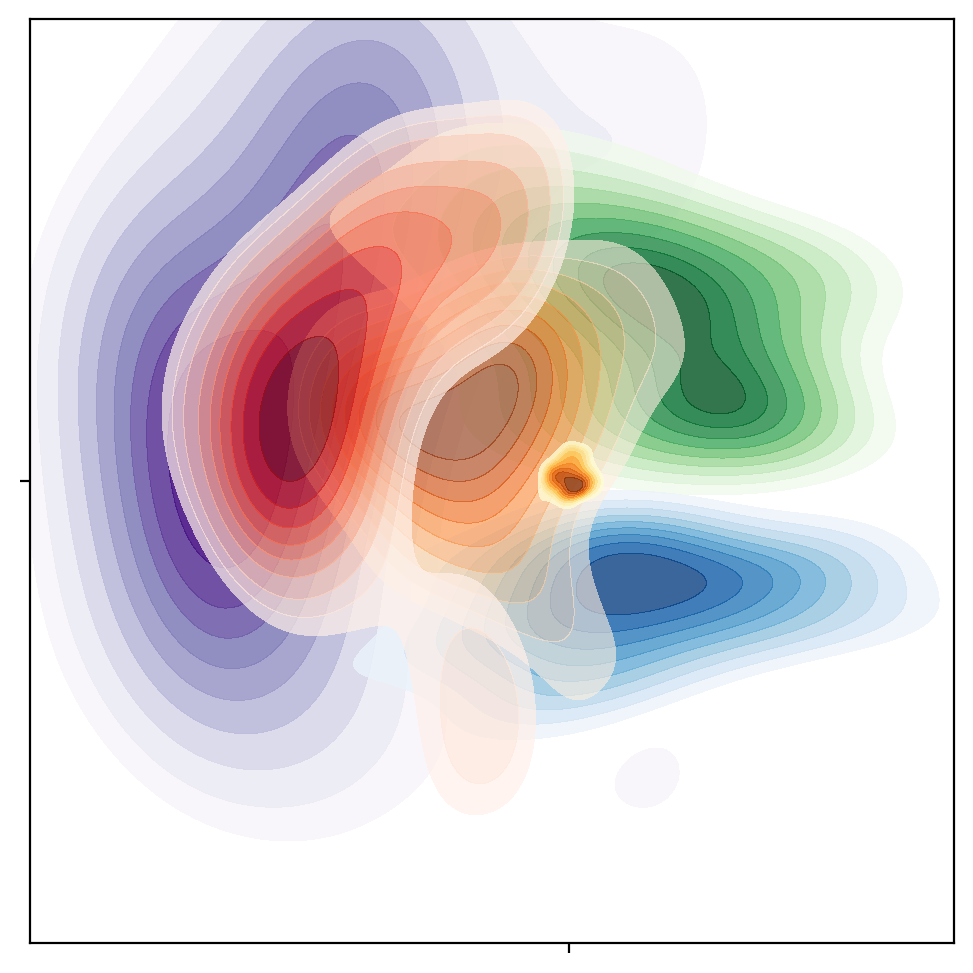

In [109]:
data_dir = '../alfyn_results_stage2/saved_files_10/CellDiff_Dataset_Landscape/'
file_name = data_dir + 'optimization_log.csv'

# log = pd.read_csv(file_name, sep='\t', names=['Timecode', 'Init timecode', 'Fitness'], skiprows=1)
log = np.genfromtxt(file_name, delimiter='\t', skip_header=1, names=['Timecode', 'Init_timecode', 'Fitness'], dtype=None, encoding='utf-8')
print(log.shape)

# fitness threshold for selecting landscapes


for (n_landscapes, gen) in ((239, 300), (60, 300)):
    print(n_landscapes, gen)
    fitness_threshold = np.partition(log['Fitness'], -n_landscapes)[-n_landscapes]
    print(fitness_threshold)

    timecodes = log['Timecode'][log['Fitness'] >= fitness_threshold]
    fitnesses = log['Fitness'][log['Fitness'] >= fitness_threshold]
    print(len(timecodes))


    all_pars = np.zeros((n_landscapes, 2*6 + 3*2*5))

    for i, timecode in enumerate(timecodes):
        # print(timecode)
        all_pars[i, :], par_names, par_colors = pars_from_timecode(timecode, data_dir, gen)


    fig, ax = plt.subplots(figsize=(6,6))
    sns.kdeplot(x=all_pars[:, 10], y=all_pars[:, 11], cmap='Purples', fill=True, alpha=0.9, thresh=0.25)
    sns.kdeplot(x=all_pars[:, 6], y=all_pars[:, 7], cmap='Greens', fill=True, alpha=0.8, thresh=0.25)
    sns.kdeplot(x=all_pars[:, 8], y=all_pars[:, 9], cmap='Blues', fill=True, alpha=0.8, thresh=0.25)
    sns.kdeplot(x=all_pars[:, 2], y=all_pars[:, 3], cmap='Oranges', fill=True, alpha=0.6, thresh=0.25)
    sns.kdeplot(x=all_pars[:, 0], y=all_pars[:, 1], cmap='Reds', fill=True, alpha=0.7, thresh=0.25)
    sns.kdeplot(x=0.25*np.random.randn(n_landscapes), y=0.25*np.random.randn(n_landscapes), cmap='YlOrBr', fill=True, alpha=0.8, thresh=0.25)

    plt.ylim((-6,6))
    plt.xlim((-7, 5))
    plt.xticks((0,), labels=[])
    plt.yticks((0,), labels=[])

    ax.set_aspect('equal')
    plt.show()

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_5727/551828622.py:16: RuntimeWarning: invalid value encountered in divide
  norm_coords = (module_coords.T / np.linalg.norm(module_coords, axis=1).T).T


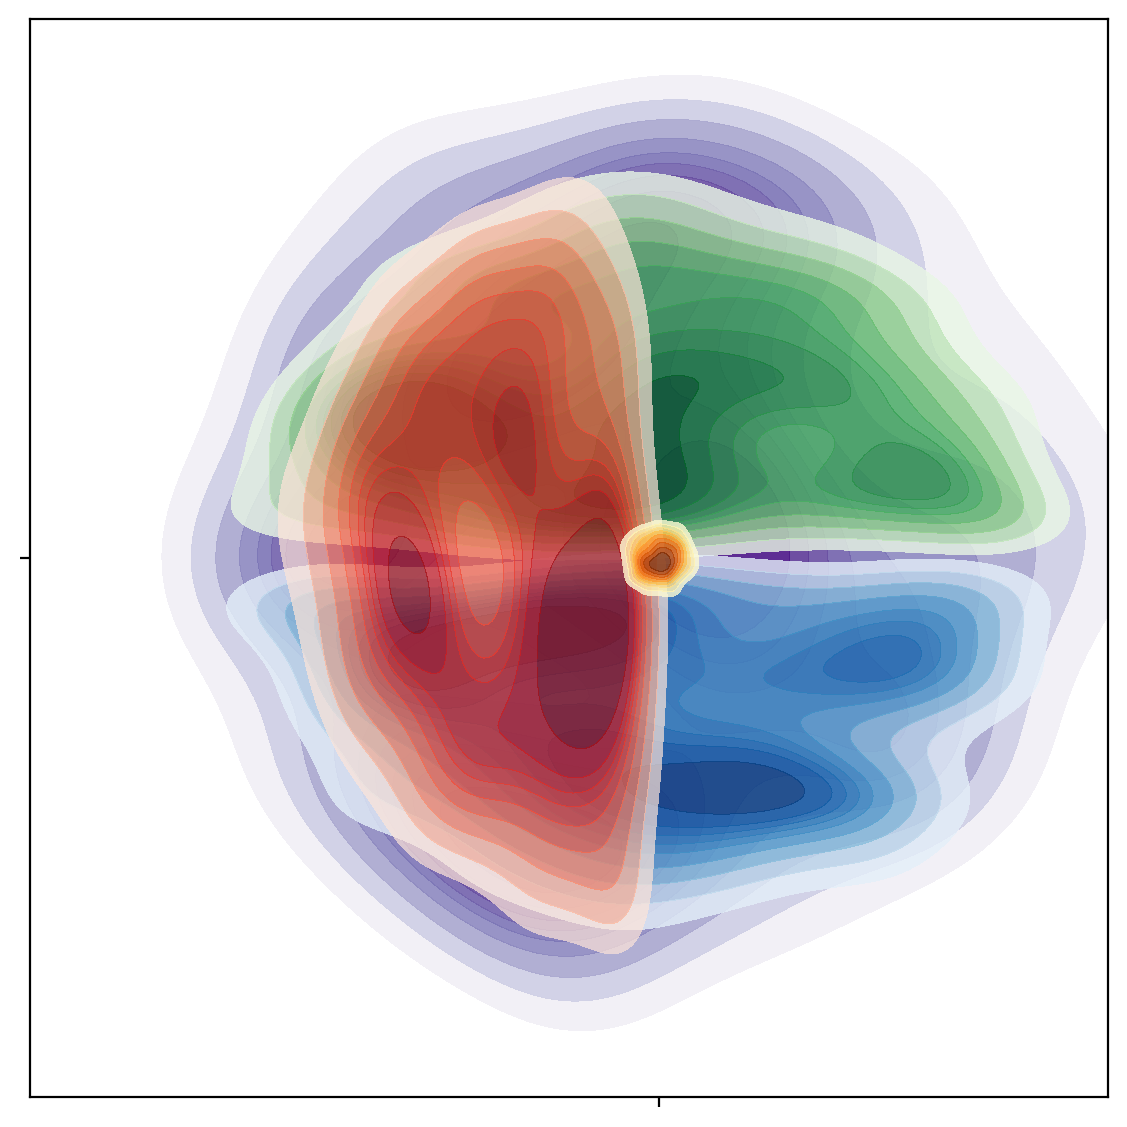

In [98]:
origin=2
direction=(3,4)
bottom=4
left = 0

n_landscapes = 1200
all_pars = np.zeros((n_landscapes, 12))

for n in range(n_landscapes):
    pars = []
    module_coords = np.random.uniform(-4., 4., (6, 2))
    module_coords[5] = np.random.uniform(-5., 5., (1, 2))
    module_coords[2] = np.random.uniform(-1., 1., (1, 2))
    module_coords = module_coords - module_coords[origin]

    norm_coords = (module_coords.T / np.linalg.norm(module_coords, axis=1).T).T
    x, y = np.sum(norm_coords[direction, 0]), np.sum(norm_coords[direction, 1])

    d = np.linalg.norm((x, y))
    R = np.array([[x, y], [-y, x]]) / d
    module_coords = (R @ module_coords.T).T

    if module_coords[bottom, 1] > 0:  # flip the y-axis if needed
        module_coords[:, 1] *= -1.
    if module_coords[left, 0] > 0:  # flip the x-axis if needed
        module_coords[:, 0] *= -1.

    for i in range(6):
        pars.append(module_coords[i, 0])
        pars.append(module_coords[i, 1])
    all_pars[n, :] = pars

fig, ax = plt.subplots(figsize=(7,7))
sns.kdeplot(x=all_pars[:, 10], y=all_pars[:, 11], cmap='Purples', fill=True, alpha=0.9, thresh=0.25)
sns.kdeplot(x=all_pars[:, 6], y=all_pars[:, 7], cmap='Greens', fill=True, alpha=0.8, thresh=0.25)
sns.kdeplot(x=all_pars[:, 8], y=all_pars[:, 9], cmap='Blues', fill=True, alpha=0.8, thresh=0.25)
# sns.kdeplot(x=all_pars[:, 2], y=all_pars[:, 3], cmap='Oranges', fill=True, alpha=0.5, thresh=0.2)
sns.kdeplot(x=all_pars[:, 0], y=all_pars[:, 1], cmap='Reds', fill=True, alpha=0.7, thresh=0.25)
sns.kdeplot(x=0.25*np.random.randn(n_landscapes), y=0.25*np.random.randn(n_landscapes), cmap='YlOrBr', fill=True, alpha=0.8, thresh=0.25)

plt.ylim((-6,6))
plt.xlim((-7, 5))
plt.xticks((0,), labels=[])
plt.yticks((0,), labels=[])

ax.set_aspect('equal')
plt.show()

In [ ]:
# Epi - AN - CE decision
# sns.kdeplot(x=all_pars[:, 6], y=all_pars[:, 7], cmap='Greens', fill=True, alpha=0.4, thresh=0.2)
# sns.kdeplot(x=all_pars[:, 8], y=all_pars[:, 9], cmap='Blues', fill=True, alpha=0.4, thresh=0.2)
# sns.kdeplot(x=all_pars[:, 2], y=all_pars[:, 3], cmap='Oranges', fill=True, alpha=0.9, thresh=0.2)
# sns.kdeplot(x=all_pars[:, 4], y=all_pars[:, 5], cmap='YlOrBr', fill=True, alpha=0.9, thresh=0.2)
# sns.kdeplot(x=all_pars[:, 10], y=all_pars[:, 11], cmap='Purples', fill=True, alpha=0.9, thresh=0.2)
# sns.kdeplot(x=0.25*np.random.randn(n_landscapes), y=0.25*np.random.randn(n_landscapes), cmap='Reds', fill=True, alpha=0.9, thresh=0.2)
# _________________________________________
# plt.scatter(all_pars[:, 6], y=all_pars[:, 7], c=colors[3], s=30, marker='D', alpha=0.4, edgecolors='None', zorder=0)
# plt.scatter(all_pars[:, 8], y=all_pars[:, 9], c=colors[4], s=30, marker='D', alpha=0.4, edgecolors='None', zorder=0)